In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image
import os
import random

In [ ]:
cap=cv2.VideoCapture('car-movie.gif')

# Lucas-Kanade Algorithm

In [ ]:
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 10,
                       blockSize = 7 )
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
color = np.random.randint(0, 255, (100, 3))

In [ ]:
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame,
                        cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None,
                             **feature_params)
import os
mask = np.zeros_like(old_frame)

In [ ]:
output_folder = 'lk_output_frames'
os.makedirs(output_folder, exist_ok=True)

In [ ]:
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    if p1 is None or st is None:
        print(f"Error: Optical flow calculation failed for frame {frame_count}")
        break

    good_new = p1[st == 1]
    good_old = p0[st == 1]

    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel().astype(int)
        c, d = old.ravel().astype(int)
        mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
        frame = cv2.circle(frame, (a, b), 5, color[i].tolist(), -1)

    img = cv2.add(frame, mask)

    output_file = os.path.join(output_folder, f'output_frame_{frame_count:04d}.jpg')
    cv2.imwrite(output_file, img)

    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

    frame_count += 1

cap.release()

In [ ]:
from PIL import Image
import os
image_files = sorted([file for file in os.listdir("/content/lk_output_frames/") if file.endswith('.jpg')])

In [ ]:
num_frames = 8
import random
selected_indices = random.sample(range(len(image_files)), num_frames)
selected_files = [image_files[idx] for idx in selected_indices]

In [ ]:
num_cols = 4
num_rows = 2

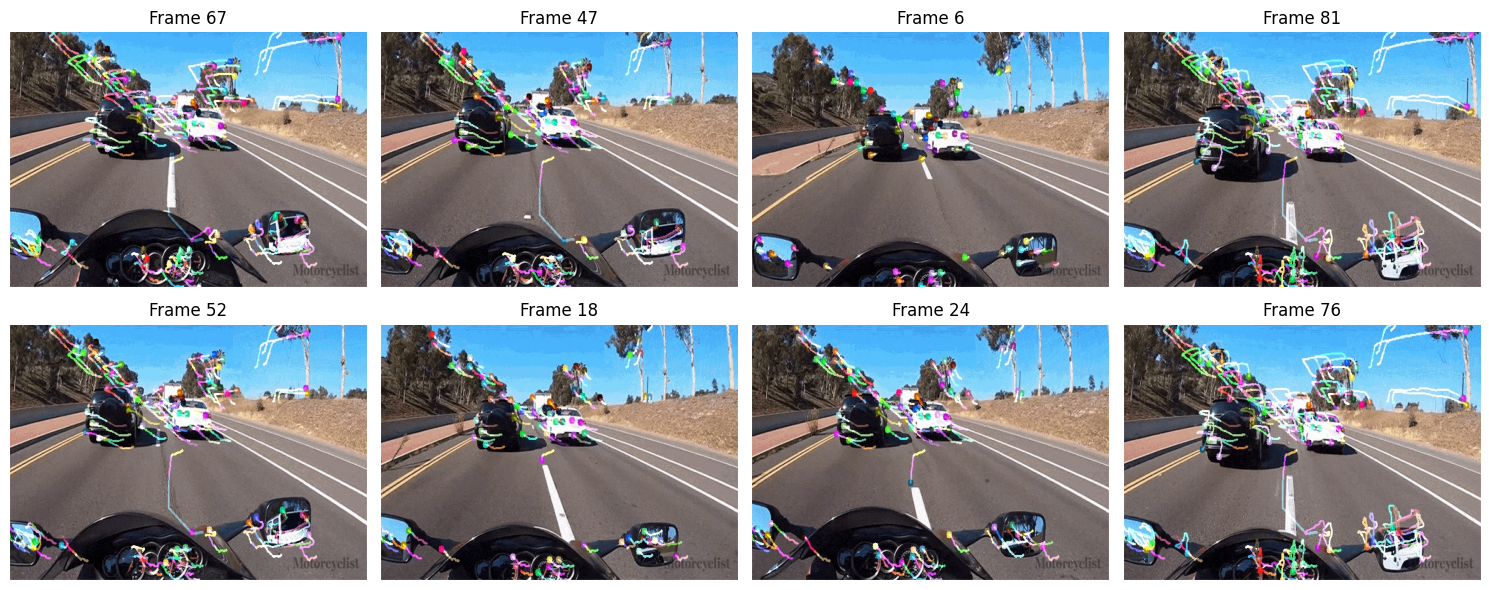

In [ ]:
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6))

for i, image_file in enumerate(selected_files):
    row_index = i // num_cols
    col_index = i % num_cols

    image_path = os.path.join(output_folder, image_file)
    image = plt.imread(image_path)


    axs[row_index, col_index].imshow(image)
    axs[row_index, col_index].axis('off')
    axs[row_index, col_index].set_title(f"Frame {selected_indices[i]}")


    axs[row_index, col_index].set_aspect('auto')
    axs[row_index, col_index].autoscale(enable=True)

plt.tight_layout()
plt.show()

# Farneback Algorithm

In [ ]:
pyr_scale = 0.5
levels = 3
winsize = 15
iterations = 3
poly_n = 5
poly_sigma = 1.2
flags = 0

In [ ]:
output_folder = '/content/fb_output_frames/'
os.makedirs(output_folder, exist_ok=True)
ret, first_frame = cap.read()

In [ ]:
while True:

    ret, frame = cap.read()
    if not ret:
        break


    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


    flow = cv2.calcOpticalFlowFarneback(
        prev=old_gray, next=frame_gray, flow=None,
        pyr_scale=pyr_scale, levels=levels, winsize=winsize,
        iterations=iterations, poly_n=poly_n, poly_sigma=poly_sigma, flags=flags
    )


    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])


    hsv = np.zeros_like(frame)
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 1] = 255
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    rgb_flow = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)


    output_file = os.path.join(output_folder, f'output_frame_{frame_count:04d}.jpg')
    cv2.imwrite(output_file, rgb_flow)


    old_gray = frame_gray


    frame_count += 1


cap.release()

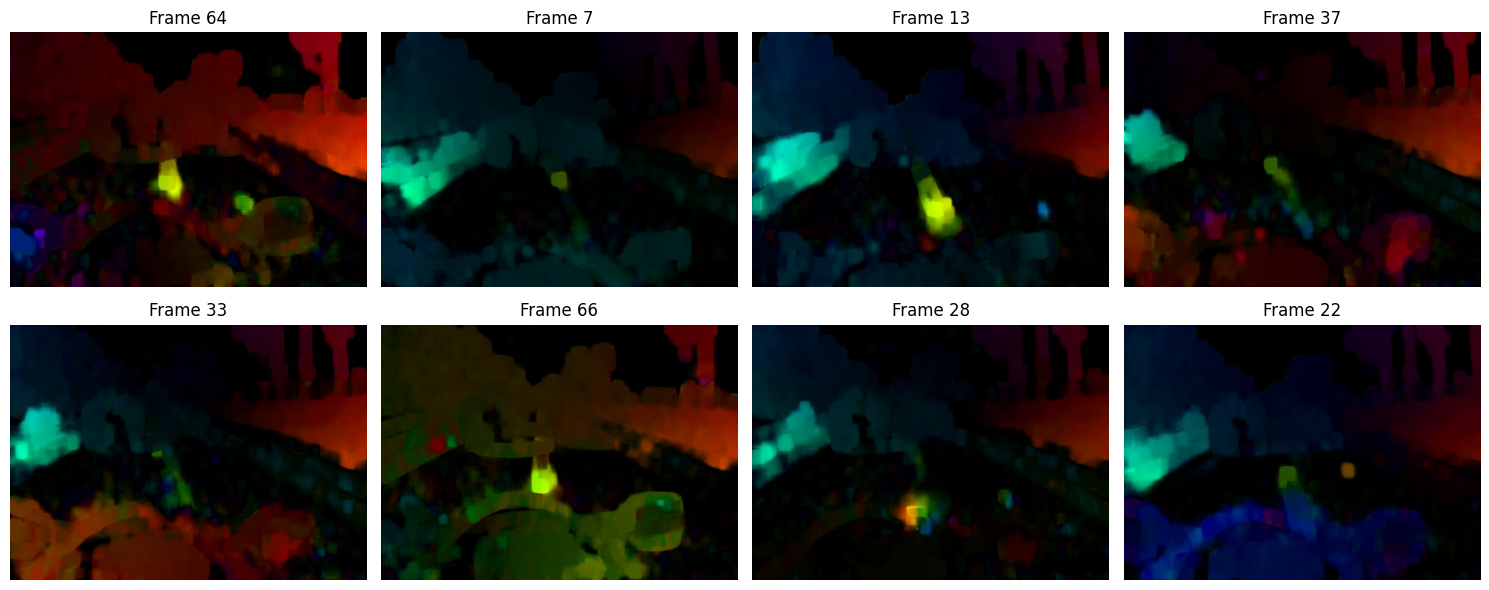

In [ ]:
image_files = sorted([file for file in os.listdir("/content/fb_output_frames/") if file.endswith('.jpg')])
num_frames = 8
import random
selected_indices = random.sample(range(len(image_files)), num_frames)
selected_files = [image_files[idx] for idx in selected_indices]

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6))

for i, image_file in enumerate(selected_files):
    row_index = i // num_cols
    col_index = i % num_cols

    image_path = os.path.join(output_folder, image_file)
    image = plt.imread(image_path)


    axs[row_index, col_index].imshow(image)
    axs[row_index, col_index].axis('off')
    axs[row_index, col_index].set_title(f"Frame {selected_indices[i]}")


    axs[row_index, col_index].set_aspect('auto')
    axs[row_index, col_index].autoscale(enable=True)

plt.tight_layout()
plt.show()